# Ghana Conflict Event
## Exploratory Data Analysis 

**Author:** Abdel An'lah TIDJANI

**Date:** December 31,2021

### Notebook Configuration

In [123]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from Wrangledata import wrangle #Our function

In [124]:
# Number of rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

### Load Data


In [125]:
# Load data
dataset_name = 'data/1980-11-04-2021-11-13-Ghana.csv'
df = wrangle(dataset_name)

D:\ASE Master II\Political Economy\Armed_Conflict_Event\Wrangledata.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\ASE Master II\Political Economy\Armed_Conflict_Event\Wrangledata.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\ASE Master II\Political Economy\Armed_Conflict_Event\Wrangledata.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Inspect the Structure
The data frame contains 18 attributes, and 1,276 observations.

In [126]:
print("Shape of the data:", df.shape)
Rows,Cols=df.shape
df.head()

Shape of the data: (1276, 18)


,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,source_scale,notes,fatalities,inter_1,inter_2,interact
0,2021-11-04,2021,Protests,Peaceful protest,Protesters (Ghana),NaN,Eastern,Akwapem North,Larteh,5.9395,-0.0689,GNA (Ghana),National,"On 4 November 2021, members of the Presbyteria...",0,protesters,no victime,sole protester action
1,2021-11-03,2021,Riots,Violent demonstration,Rioters (Ghana),Police Forces of Ghana (2017-),Central,Assin North,Assin Bereku,5.8678,-1.3389,Citi News; Ghana Web,National,"On 3 November 2021, workers of the Shimizu Dai...",0,rioters,state forces,military versus rioters
2,2021-11-03,2021,Protests,Peaceful protest,Protesters (Ghana),NaN,Ashanti,Amansie West,Manso Atwere,6.4574,-1.8575,Citi News,National,"On 3 November 2021, residents demonstrated in ...",0,protesters,no victime,sole protester action
3,2021-11-01,2021,Riots,Mob violence,Rioters (Ghana),Police Forces of Ghana (2017-),Northern,Tamale,Tamale,9.4008,-0.8393,GNA (Ghana),National,"On 1 November 2021, residents of Kukuo suburb ...",0,rioters,state forces,military versus rioters
4,2021-10-30,2021,Battles,Armed clash,Nadu Warriors Communal Militia (Ghana),Police Forces of Ghana (2017-),Eastern,Lower Manya,Krobo,6.1299,0.0012,Ghana Web; Chronicle (Ghana),National,"On 30 October 2021, members of the Nadu Warrio...",0,communal militias,state forces,military versus communal militia


In [127]:
df.columns

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'actor2', 'admin1', 'admin2', 'location', 'latitude', 'longitude',
       'source', 'source_scale', 'notes', 'fatalities', 'inter_1', 'inter_2',
       'interact'],
      dtype='object')

## Map of incidences in the conflict data set.

In [128]:
# Plot Mapbox location and event type

fig = px.scatter_mapbox(
    df, # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=1000, # Width of map
    height=700, # Height of map
    # size="fatalities",
    color="event_type",
    hover_data=["interact","year","fatalities","location"], # Display notes when hovering mouse over event
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### basic data explore 

Event

In [129]:
# number of records

print("event county count:",df["admin1"].nunique())
print("event state count:",df["admin2"].nunique())
print("event type count:",df["event_type"].nunique())
print("event sub_event_type count:",df["sub_event_type"].nunique())

event county count: 16
event state count: 175
event type count: 5
event sub_event_type count: 16


In [130]:
event_type=df["event_type"].value_counts()
event_type

Protests                      486
Riots                         343
Violence against civilians    246
Battles                       165
Strategic developments         36
Name: event_type, dtype: int64

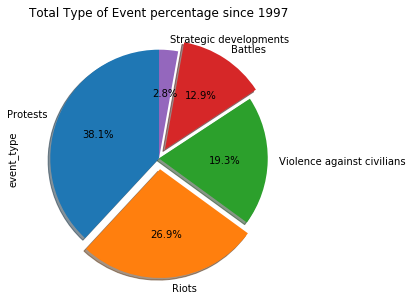

In [131]:
explode = (0,0.1, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

event_type.plot(kind="pie", explode=explode, labels=event_type.index, autopct='%1.1f%%',figsize=(8,5),
        shadow=True, startangle=90)
plt.title('Total Type of Event percentage since 1997') ;

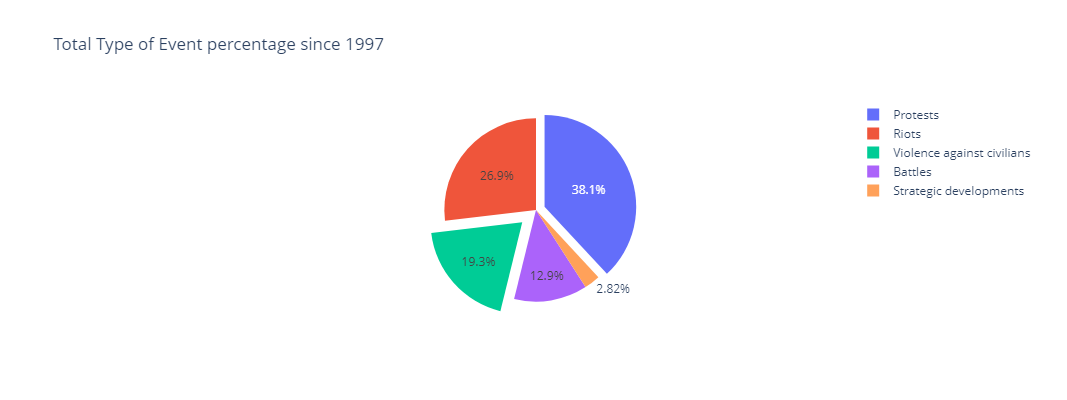

In [132]:
# Interactive with plotly

fig = go.Figure(data=[go.Pie(labels=event_type.index, 
                             values=event_type, 
                             pull=[0.1, 0, 0.2,0, 0])])
fig.update_layout(
    title_text="Total Type of Event percentage since 1997",
    autosize=False,
    width=600,
    height=400,)

In [133]:
# event and sub_event 

sub_event=df.groupby(["event_type","sub_event_type"])["event_date"].agg({'count'}).reset_index()
sub_event

,event_type,sub_event_type,count
0,Battles,Armed clash,165
1,Protests,Excessive force against protesters,12
2,Protests,Peaceful protest,429
3,Protests,Protest with intervention,45
4,Riots,Mob violence,178
5,Riots,Violent demonstration,165
6,Strategic developments,Agreement,1
7,Strategic developments,Arrests,3
8,Strategic developments,Change to group/activity,6
9,Strategic developments,Disrupted weapons use,4


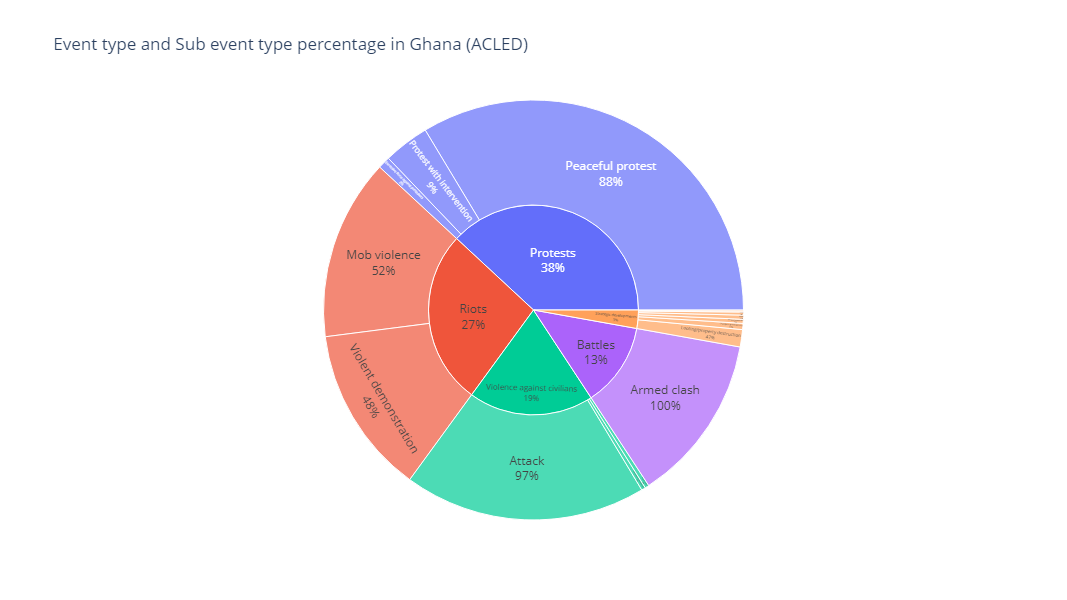

In [134]:
# Event type and Sub event type visualisation 

fig = px.sunburst(sub_event, 
                  path=['event_type', 'sub_event_type'], 
                  values='count',
                 title=' Event type and Sub event type percentage in Ghana (ACLED)',
                 width=600, # Width of map
                height=600,)
fig.update_traces(textinfo="label+percent parent")
fig.show()

>

Actor type involved 

In [135]:
actor_type1=df["inter_1"].value_counts()
actor_type1

protesters            483
rioters               339
communal militias     173
political militias    167
state forces           89
other forces           19
rebel groups            6
Name: inter_1, dtype: int64

In [ ]:
actor_type2=df["inter_2"].value_counts()
actor_type2

no victime            503
civilians             357
state forces          201
communal militias     104
rioters                68
political militias     35
other forces            3
protesters              3
rebel groups            2
Name: inter_2, dtype: int64

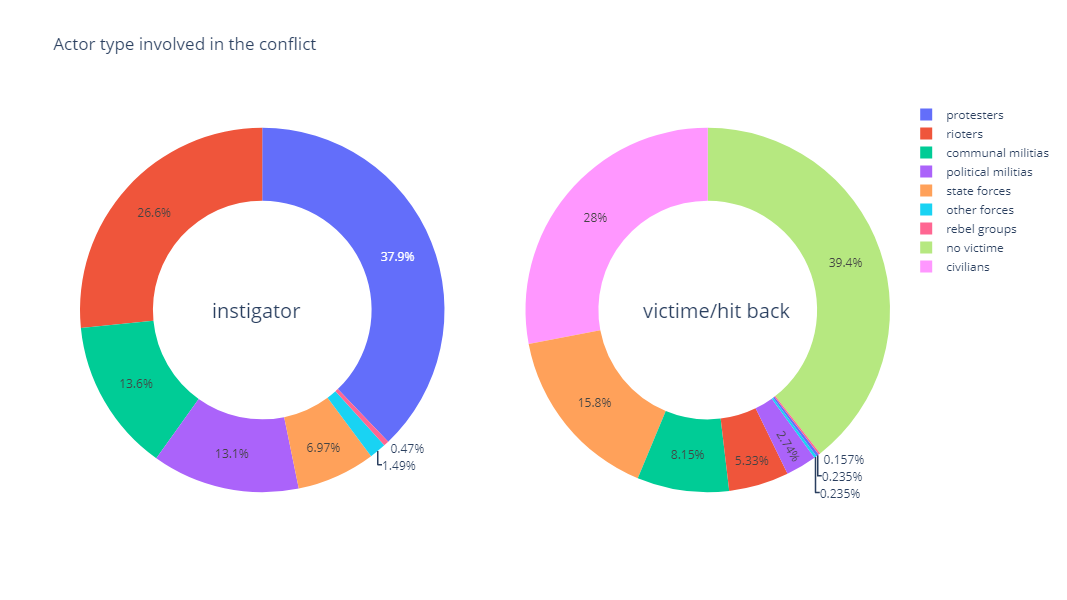

In [ ]:
# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=actor_type1.index, values=actor_type1,name="Actor type1"),1,1)
fig.add_trace(go.Pie(labels=actor_type2.index, values=actor_type2,name="Actor type2"),1,2)
fig.update_traces(hole=.6, hoverinfo="label+percent+name") # Use `hole` to create a donut-like pie chart
fig.update_layout(
    title_text="Actor type involved in the conflict",
    uniformtext_minsize=12,
    uniformtext_mode='hide',
#     autosize=False,
    width=1000,
    height=600,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='instigator', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='victime/hit back', x=0.88, y=0.5, font_size=20, showarrow=False)])


### Let look at the trend of conflict  

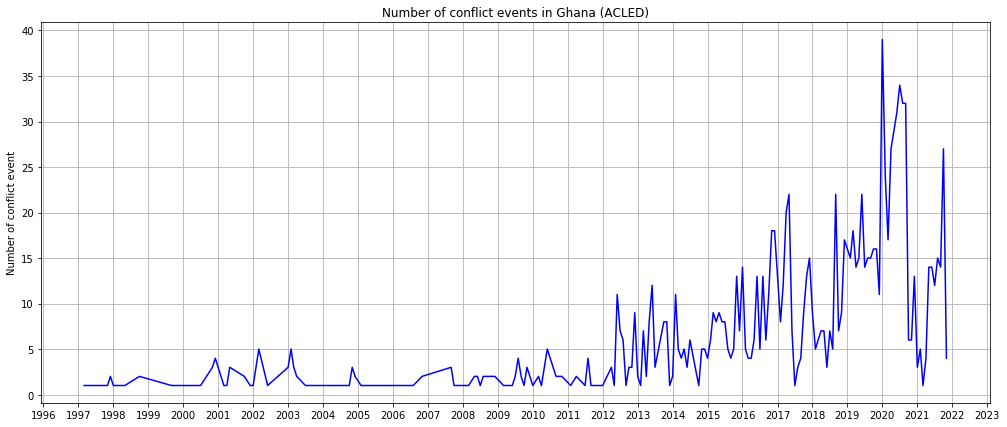

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Add labels to the plot
style = dict(size=12, color='black')

fig, ax = plt.subplots(figsize=(17, 7))

number_ev=df["event_type"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'count'})

number_ev.index = [pd.datetime(year, month,1)
                   for (year,month) in number_ev.index]

number_ev.reset_index(inplace=True)

ax.plot('index','count', data=number_ev,color="b")

# Format the x axis 
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

ax.grid(True)
plt.ylabel("Number of conflict event")
plt.title("Number of conflict events in Ghana (ACLED)");

Base on this trend, let subset the data and analyze from 2010 to present day 

In [ ]:
df=df[df["year"]>2009]
df.tail()

,event_date,year,event_type,sub_event_type,actor1,actor2,admin1,admin2,location,latitude,longitude,source,source_scale,notes,fatalities,inter_1,inter_2,interact
1172,2010-06-04,2010,Battles,Armed clash,Police Forces of Ghana (2009-2017),Military Forces of Ghana (2009-2017),Ashanti,Kumasi,Kumasi,6.6936,-1.6218,Local Source; All Africa,Subnational-Regional,Police attacked military,0,state forces,state forces,military versus military
1173,2010-04-01,2010,Violence against civilians,Attack,Unidentified Armed Group (Ghana),Civilians (Ghana),Upper East,Bawku,Bawku,11.0500,-0.2500,Xinhua,International,NaN,2,political militias,civilians,political militia versus civilians
1174,2010-03-22,2010,Protests,Peaceful protest,Protesters (Ghana),NaN,Greater Accra,Accra,Accra,5.5560,-0.1969,Chronicle (Ghana),Subnational,protest against attacks on Attorney General an...,0,protesters,no victime,sole protester action
1175,2010-03-07,2010,Battles,Armed clash,Binyami Ethnic Militia (Ghana),Biyambo Ethnic Militia (Ghana),North East,Bunkpurugu Yonyo,Bunkpurugu,10.5167,0.1000,Chronicle (Ghana),National,chieftancy dispute,3,communal militias,communal militias,communal militia versus communal militia
1176,2010-01-29,2010,Violence against civilians,Attack,NPP: New Patriotic Party,Civilians (Ghana),Greater Accra,Accra,Accra,5.5560,-0.1969,Chronicle (Ghana),Subnational,NPP supporters of Nana Addo attack the Greater...,0,political militias,civilians,political militia versus civilians


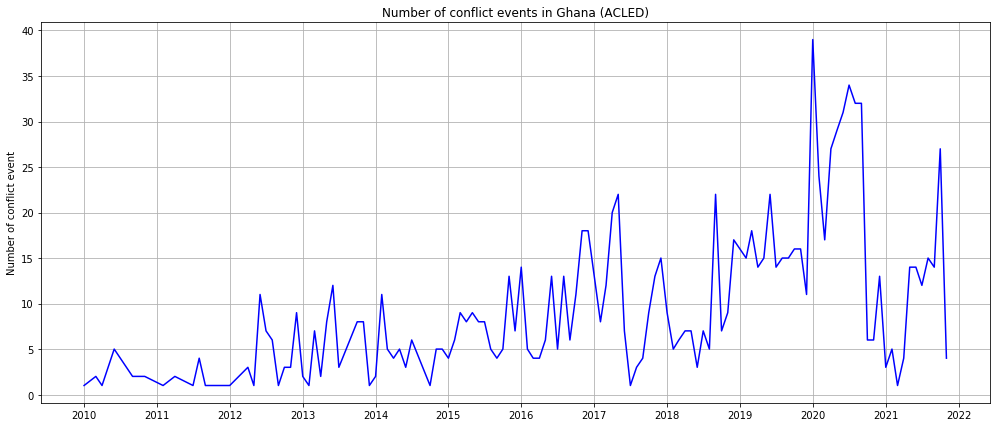

In [ ]:
fig, ax = plt.subplots(figsize=(17, 7))

number_ev=df["event_type"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'count'})

number_ev.index = [pd.datetime(year, month,1)
                   for (year,month) in number_ev.index]

number_ev.reset_index(inplace=True)
# plot
ax.plot('index','count', data=number_ev,color="b")

# Format the x axis 
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

ax.grid(True)
plt.ylabel("Number of conflict event")
plt.title("Number of conflict events in Ghana (ACLED)");

Another view using Bar plot

In [ ]:
year_event = pd.crosstab(df.year,df.event_type).reset_index()

In [ ]:
fig = px.bar(year_event, x="year", 
             y=["Protests","Riots","Violence against civilians","Battles","Strategic developments"],
             title="Political violence & protest events in Ghana (2010 - 13 nov 2021)",
             labels={'value':'Number of Event','variable':'Event Type'} ,
            width=1000, # Width of map
            height=600
            )
fig.update_layout(
    # barmode='group',  # comment this line to see stacked bar
    xaxis_tickangle=0,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

> We can see that during 2019 and 2020 each event increase,specialy `Protest`, `Riots`,and `Battles` 

In [ ]:
# event distribution by event_type and county

county_event_count=df.pivot_table(index="event_type",
                                  columns=["admin1"],
                                  values="event_date",
                                  aggfunc="count",)
county_event_count

admin1,Ahafo,Ashanti,Bono,Bono East,Central,Eastern,Greater Accra,North East,Northern,Oti,Savannah,Upper East,Upper West,Volta,Western,Western North
event_type,,,,,,,,,,,,,,,,
Battles,3.0,11.0,2.0,1.0,8.0,11.0,21.0,20.0,23.0,4.0,4.0,12.0,4.0,6.0,1.0,NaN
Protests,4.0,80.0,8.0,4.0,31.0,39.0,186.0,8.0,26.0,NaN,6.0,20.0,8.0,20.0,29.0,3.0
Riots,9.0,66.0,11.0,9.0,26.0,41.0,59.0,4.0,35.0,2.0,12.0,9.0,15.0,13.0,15.0,5.0
Strategic developments,NaN,4.0,1.0,NaN,1.0,1.0,10.0,2.0,5.0,NaN,NaN,1.0,1.0,6.0,3.0,NaN
Violence against civilians,6.0,23.0,8.0,6.0,18.0,22.0,61.0,8.0,19.0,4.0,6.0,6.0,6.0,5.0,10.0,NaN


In [ ]:
fig = px.imshow(county_event_count, 
                text_auto=True,
                width=1000,
                height=500,
               aspect="auto",
               title="Heatmap event distribution by event_type and county")
fig.update_layout(xaxis_tickangle=90,)
fig.show()

>`Protests` event occurs most of the time in `Greater Accra` where Accra Ghana's capital is and `Ashanti`

>  Most of `Battles` occurred in the North part of Ghana ,`North East` and `Northern `

### Fatalities trend

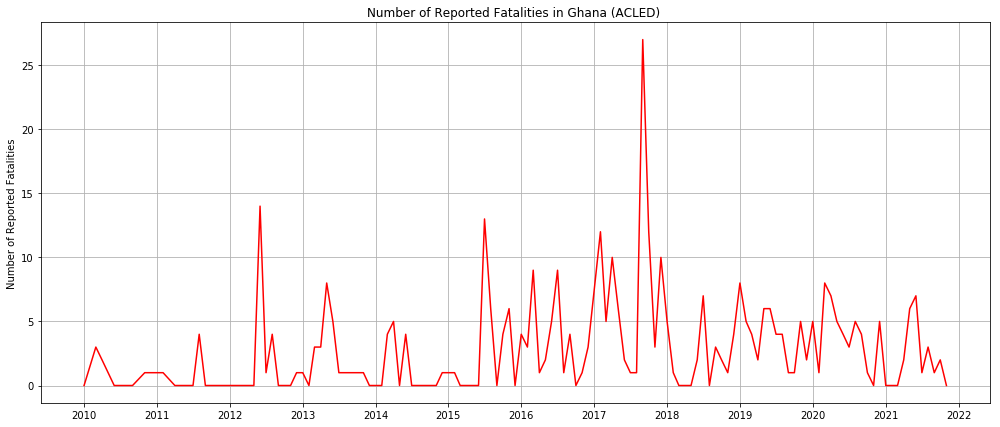

In [ ]:
# fatalities trends using event_date

fig, ax = plt.subplots(figsize=(17, 7))

number_fatalities = df["fatalities"].groupby([df['event_date'].dt.year.rename('year'), 
             df['event_date'].dt.month.rename('month')]).agg({'sum'})

number_fatalities.index = [pd.datetime(year, month,1)
                   for (year,month) in number_fatalities.index]

number_fatalities.reset_index(inplace=True)

ax.plot('index','sum', data=number_fatalities,color="r")

# Format the x axis 
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

ax.grid(True)
plt.ylabel("Number of Reported Fatalities")
plt.title("Number of Reported Fatalities in Ghana (ACLED) ");

Let have a better look with bar plot  

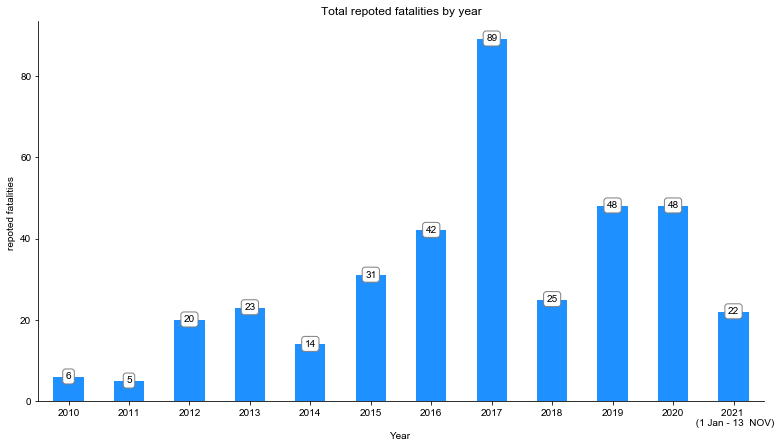

In [ ]:
# Total repoted fatalities by year
year_fatalities=df.groupby(['year',])[['fatalities']].sum()
year_fatalities.plot(kind="bar",figsize=(13,7),legend=False,color='dodgerblue')
a=list(year_fatalities.fatalities)
for index,i in enumerate(a):   
    y= str(round(i))
    plt.annotate(y,xy=(index,i),xycoords='data',bbox=dict(boxstyle="round", fc="white", ec="gray"),
             xytext=(0,-2),textcoords='offset points', ha='center')
sns.set_style("white")
plt.xlabel("Year ")
plt.ylabel("repoted fatalities ")
# plt.xticks(rotation=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['2010','2011','2012','2013','2014',
     '2015','2016','2017','2018','2019','2020','2021 \n (1 Jan - 13  NOV)'] ,rotation=0)
plt.title("Total repoted fatalities by year", );
sns.despine()


Let  zoom-in in year 2017 and see what happen 

In [ ]:
# Total fatalities  by event_type and county

E2017=df[df["year"]==2017] .pivot_table(index="interact",
                                  columns=["event_type"],
                                  values="fatalities",
                                  aggfunc="sum",)
E2017.drop([col for col, val in E2017.sum().iteritems() if val < 1], axis=1, inplace=True)
E2017.drop([col for col, val in E2017.sum(axis=1).iteritems() if val < 1], axis=0, inplace=True)
E2017


event_type,Battles,Riots,Violence against civilians
interact,,,
communal militia versus civilians,NaN,NaN,39.0
communal militia versus communal militia,31.0,NaN,NaN
military versus civilians,NaN,NaN,3.0
military versus communal militia,2.0,NaN,NaN
military versus political militia,1.0,NaN,NaN
military versus rioters,NaN,3.0,NaN
other actor versus civilians,NaN,NaN,1.0
political militia versus civilians,NaN,NaN,5.0
political militia versus communal militia,1.0,NaN,NaN


In [ ]:
fig = px.imshow(E2017, 
                text_auto=True,
                width=600,
                    height=600,
               aspect="auto",
              title="Heatmap of total fatalities by event_type and interaction in 2017")
fig.update_layout(xaxis_tickangle=45,)
           
fig.show()

>We can see that during  year 2017  Battles and Violence against civilians cause the most death.
From the heatmap the interaction between communal militia against
communal militia  cause the most death in Battles and also the most death of civilians
is perpetrator by communal militia. This show that , communal militia cause more than
85% of the total reported fatalities in 2017.


Let look at all the ten past years



In [ ]:
# Total fatalities  by event_type and county

event_interaction = df.pivot_table(index="event_type",
                                  columns=["interact"],
                                  values="fatalities",
                                  aggfunc="sum",)
event_interaction.drop([col for col, val in event_interaction.sum().iteritems() if val < 1], axis=1, inplace=True)
event_interaction.drop([col for col, val in event_interaction.sum(axis=1).iteritems() if val < 1], axis=0, inplace=True)
event_interaction


interact,communal militia versus civilians,communal militia versus communal militia,military versus civilians,military versus communal militia,military versus political militia,military versus protesters,military versus rebels,military versus rioters,other actor versus civilians,political militia versus civilians,political militia versus communal militia,political militia versus political militia,political militia versus rioters,rioters versus civilians,rioters versus rioters
event_type,,,,,,,,,,,,,,,
Battles,NaN,103.0,NaN,8.0,11.0,NaN,1.0,NaN,NaN,NaN,13.0,5.0,NaN,NaN,NaN
Protests,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Riots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,4.0,43.0,25.0
Violence against civilians,70.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,6.0,50.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = px.imshow(event_interaction, 
                text_auto=True,
                width=1000,
                    height=500,
               aspect="auto",
              title="Heatmap of total fatalities by event_type and interaction")
fig.update_layout(xaxis_tickangle=45,)
           
fig.show()

In [ ]:
# Total fatalities  by event_type and county

county_fataliy=df.pivot_table(index="event_type",
                                  columns=["admin1"],
                                  values="fatalities",
                                  aggfunc="sum",)
county_fataliy

In [ ]:
fig = px.imshow(county_fataliy, 
                text_auto=True,
                width=1000,
                    height=500,
               aspect="auto",
              title="Heatmap of total fatalities by event_type and county")
fig.update_layout(xaxis_tickangle=90,)
           
fig.show()

> `Battles` is the event with high reported fatalities during this past ten years, following by `violence against civilians` which occurs most of the time at the North part of Ghana, the center part and the capital as well 

Let look deeper into Battles

In [ ]:
Battles = df[df["event_type"]=="Battles"]

In [ ]:
battles_event = pd.crosstab(Battles.year,Battles.interact).reset_index()
battles_event

In [ ]:
fig = px.bar(battles_event, x="year", 
             y=battles_event.columns[1:],
             title="Interaction in Battles events in Ghana (2010 - 13 nov 2021)",
             labels={'value':'Number of Event','variable':'Interaction'} ,
            width=1000, # Width of map
            height=600
            )
fig.update_layout(
    # barmode='group',  # comment this line to see stacked bar
    xaxis_tickangle=0,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

>most of battles each year are communal militia against communal militia (inter and intra communal violence), except in 2010 and 2011.

>This show instability in the country at local level. The multitude of ethnic armed clash each year is not negligible when Ghana country, compared to many other African countries,
has been described as a peaceful and stable country.

let look at the actor involved in those *ethnic conflict*


In [ ]:
ethnic_conflict=df[df["interact"]=="communal militia versus communal militia"]

# let combine actor1 and actor2 together 
act = ethnic_conflict["actor1"].to_list() +  ethnic_conflict["actor2"].to_list()
act=pd.DataFrame(act,columns=["actor"])
print(len(act))
act.head()

In [ ]:
f, ax = plt.subplots(1,1, figsize=(11,7))

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(act.actor.value_counts().index[0:20]))
colors.reverse()

# plot Ethnic conflict to 20 actor involved
sns.countplot(y=act.actor, order =act.actor.value_counts().index[0:20], palette=colors)
plt.xlabel(" ")
plt.ylabel("Actor")
plt.title("Ethnic conflicts - Top 20 actor involved");
sns.despine()